In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: MG
Digite os 2 primeiros digitos do shapefile: 31


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 32807 entries, 0 to 32806
Data columns (total 14 columns):
ID            32807 non-null int64
CD_GEOCODI    32807 non-null object
TIPO          32807 non-null object
CD_GEOCODB    8835 non-null object
NM_BAIRRO     8835 non-null object
CD_GEOCODS    32807 non-null object
NM_SUBDIST    7231 non-null object
CD_GEOCODD    32807 non-null object
NM_DISTRIT    32807 non-null object
CD_GEOCODM    32807 non-null object
NM_MUNICIP    32807 non-null object
NM_MICRO      32807 non-null object
NM_MESO       32807 non-null object
geometry      32807 non-null object
dtypes: int64(1), object(13)
memory usage: 3.5+ MB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(32564, 13)

In [7]:
dados.head()

CD_GEOCODI   V001   V002  V003  V004     V005        V006     V007  \
0  310010405000001  306.0  851.0  2,78  1,56   751,41   321498,19   801,15   
1  310010405000002  262.0  738.0  2,82  1,84   980,65  1382038,05  1031,85   
2  310010405000003  285.0  797.0   2,8  1,87  1064,33  6161794,93  1091,13   
3  310010405000004  310.0  883.0  2,85  2,01   643,75      751050    681,1   
4  310010405000005  310.0  885.0  2,85  1,79   801,34  1092419,93   933,89   

         V008    V009        V010    V011        V012  
0   302864,24  477,66   267230,32  689,45   239647,71  
1  1401441,09  664,95   950266,85  901,74  1075396,14  
2  6288160,68   667,3  2716229,29  871,63  3370987,14  
3    769249,2   413,2   458046,06  628,03   561479,48  
4  1149547,36  501,91   693252,84  804,52   868129,31

# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 32564 entries, 0 to 32563
Data columns (total 26 columns):
ID            32564 non-null int64
CD_GEOCODI    32564 non-null int64
TIPO          32564 non-null object
CD_GEOCODB    8753 non-null object
NM_BAIRRO     8753 non-null object
CD_GEOCODS    32564 non-null object
NM_SUBDIST    7151 non-null object
CD_GEOCODD    32564 non-null object
NM_DISTRIT    32564 non-null object
CD_GEOCODM    32564 non-null object
NM_MUNICIP    32564 non-null object
NM_MICRO      32564 non-null object
NM_MESO       32564 non-null object
geometry      32564 non-null object
V001          32441 non-null float64
V002          32441 non-null float64
V003          32441 non-null object
V004          32441 non-null object
V005          32441 non-null object
V006          32441 non-null object
V007          32436 non-null object
V008          32436 non-null object
V009          32564 non-null object
V010          32564 non-null object
V011          32545 no

In [11]:
del gdf
del dados

Text(0.5,1,'MG')

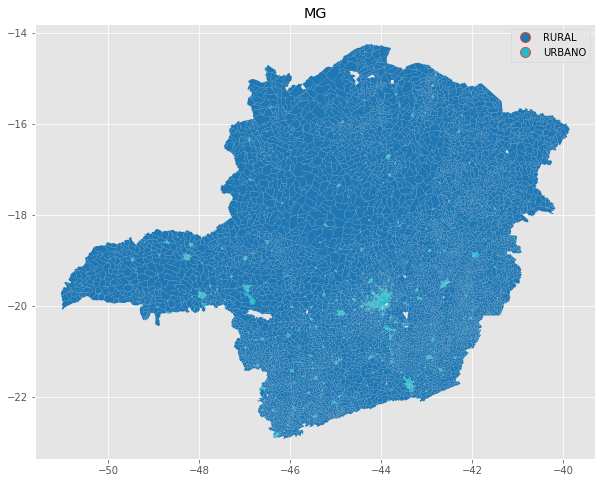

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

Municipio  UF  Area_Urb  Geocodigo  \
3058               JacuÃ­  MG     1.602  3134806.0   
3144              AbaetÃ©  MG    11.046  3100203.0   
3152  Abadia dos Dourados  MG     1.908  3100104.0   
3153           Abre Campo  MG     4.410  3100302.0   
3154              Acaiaca  MG     0.886  3100401.0   

                                               geometry       Area  
3058  POLYGON ((-46.75139183522158 -21.0228024869645...   1.601456  
3144  (POLYGON ((-45.20550112066312 -19.217086890262...  11.046179  
3152  POLYGON ((-47.40661052223441 -18.4703357605869...   1.907575  
3153  (POLYGON ((-42.47033240603669 -20.312571534577...   4.410118  
3154  POLYGON ((-43.14110607964962 -20.3591242860689...   0.885650

In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 853 entries, 3058 to 4021
Data columns (total 6 columns):
Municipio     853 non-null object
UF            853 non-null object
Area_Urb      853 non-null float64
CD_GEOCODM    853 non-null int64
geometry      853 non-null object
Area          853 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 46.6+ KB


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no MG')

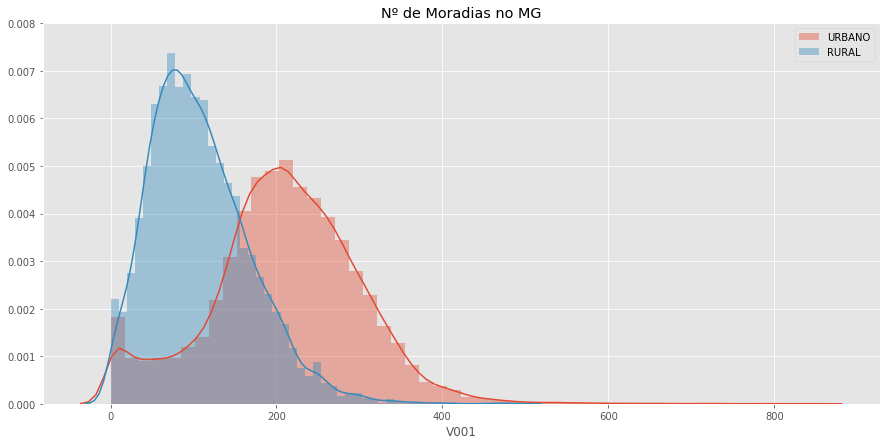

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    7780.000000
mean      108.096272
std        60.789961
min         0.000000
25%        64.000000
50%       100.000000
75%       144.250000
max       488.000000
Name: V001, dtype: float64
URBANO 
 count    24784.000000
mean       209.297692
std         90.815867
min          0.000000
25%        158.000000
50%        210.000000
75%        267.000000
max        845.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

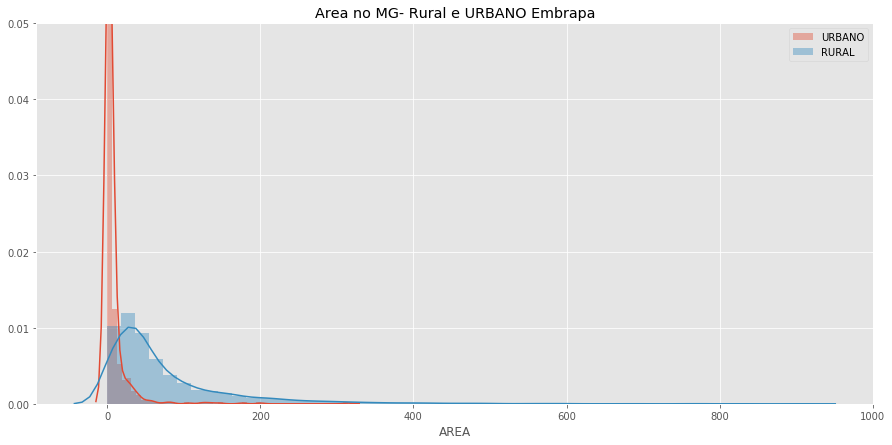

In [22]:
fig = plt.figure(figsize = (15,7))

sns.distplot(areas_urbanas_df_15['Area'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [23]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

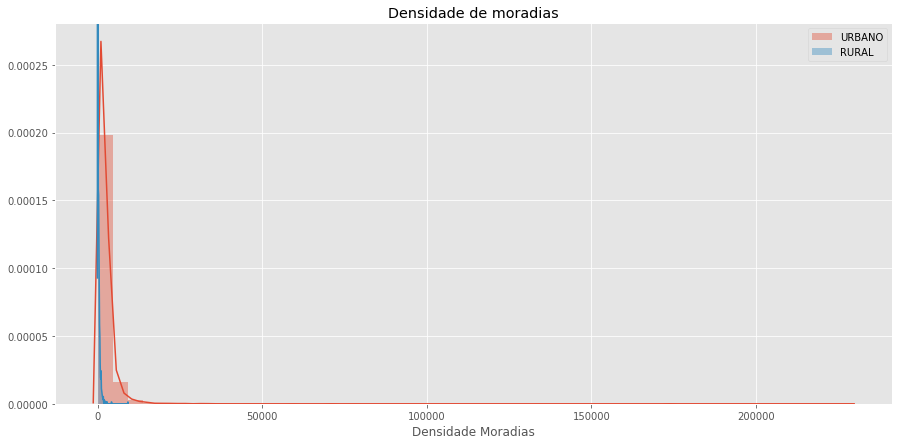

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [25]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count    7780.000000
mean       43.185087
std       209.745327
min         0.000000
25%         0.901614
50%         2.120305
75%         4.586878
max      9154.231701
Name: Densidade Moradias, dtype: float64
URBANO 
 count     24784.000000
mean       2190.243666
std        3440.469516
min           0.000000
25%         581.563967
50%        1580.908320
75%        2926.874872
max      228465.940078
Name: Densidade Moradias, dtype: float64


In [26]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

ID    CD_GEOCODI        V001         V002       AREA  \
count     71.000000  7.100000e+01   71.000000    71.000000  71.000000   
mean   20284.169014  3.142989e+14  170.239437   587.338028   0.129400   
std     8673.098813  2.006215e+12   84.024735   298.764023   0.074996   
min       65.000000  3.100302e+14   36.000000   115.000000   0.015136   
25%    15635.500000  3.131578e+14  102.500000   366.500000   0.065916   
50%    22387.000000  3.146750e+14  177.000000   585.000000   0.124598   
75%    27254.500000  3.159457e+14  237.500000   805.500000   0.184405   
max    32774.000000  3.172004e+14  357.000000  1273.000000   0.346100   

       Densidade Moradias  
count           71.000000  
mean          1565.711275  
std           1125.787558  
min            930.993821  
25%           1043.927711  
50%           1234.776884  
75%           1641.200429  
max           9154.231701

## Descrição da área por setor censitários urbanos e rurais

In [27]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count    853.000000
mean       6.996081
std       19.266736
min        0.254080
25%        1.102114
50%        2.088003
75%        5.219497
max      314.273799
Name: Area, dtype: float64
RURAL 
 count    7780.000000
mean       73.699486
std        85.766196
min         0.007206
25%        23.730623
50%        45.677956
75%        91.293480
max       908.180988
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

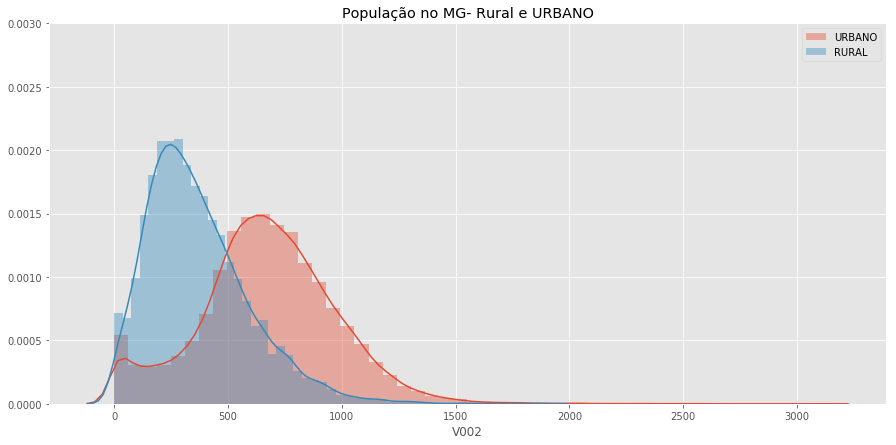

In [28]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [29]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count    7780.000000
mean      367.878149
std       224.101624
min         0.000000
25%       204.000000
50%       329.000000
75%       491.000000
max      1874.000000
Name: V002, dtype: float64
URBANO 
 count    24784.000000
mean       671.179914
std        302.221348
min          0.000000
25%        494.000000
50%        668.000000
75%        857.000000
max       3104.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [30]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [31]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [32]:
scrcu.describe()

ID    CD_GEOCODI        V001         V002      AREA  \
count      7.000000  7.000000e+00    7.000000     7.000000  7.000000   
mean   26779.571429  3.158506e+14  262.428571   906.285714  0.130988   
std     4323.643751  1.149359e+12   38.261631   122.449601  0.033761   
min    20521.000000  3.143104e+14  214.000000   757.000000  0.087439   
25%    23727.000000  3.149309e+14  235.000000   829.500000  0.110124   
50%    27095.000000  3.158607e+14  253.000000   870.000000  0.129191   
75%    29806.500000  3.168606e+14  294.000000   973.000000  0.147220   
max    32774.000000  3.172004e+14  312.000000  1112.000000  0.185595   

       Densidade Moradias  
count            7.000000  
mean          2066.068308  
std            320.368671  
min           1600.281936  
25%           1855.803356  
50%           2124.709529  
75%           2289.225934  
max           2447.428110

Text(0.5,1,'SCRCU - Por Município')

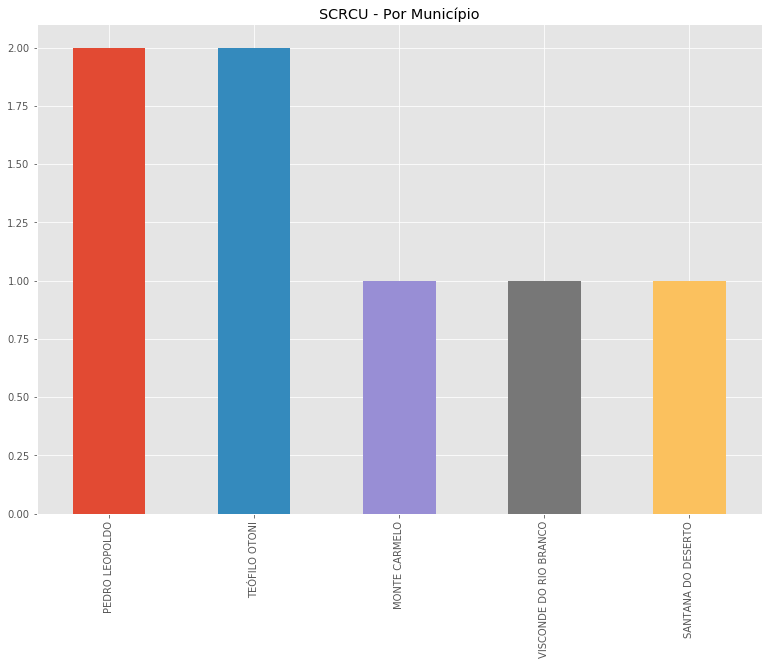

In [33]:
plt.style.use('ggplot')
scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


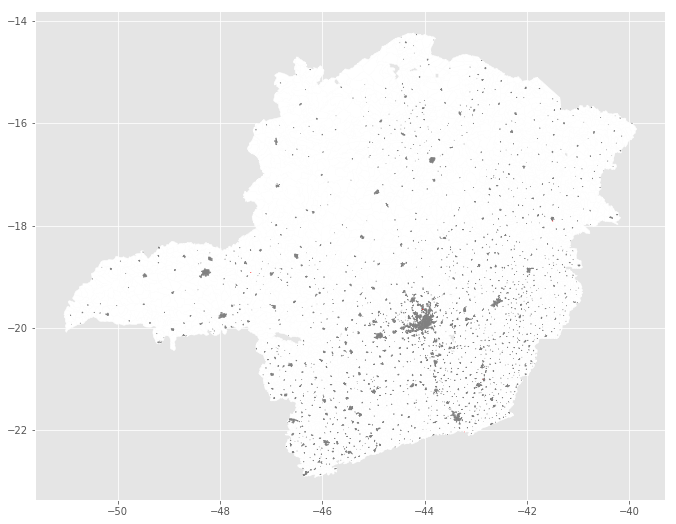

In [34]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [35]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [36]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [37]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [39]:
regioes_urbanas_df.head()

geometry  FONTE
20326  POLYGON ((-47.4013251217552 -18.9150343543432,...    1.0
23467  POLYGON ((-44.0350558151386 -19.6294718040904,...    1.0
23471  POLYGON ((-44.03282249175069 -19.6342646068083...    1.0
26830  POLYGON ((-43.2212139356422 -22.0331520985519,...    1.0
29575  POLYGON ((-41.4984400344857 -17.9141301833591,...    1.0

In [40]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [41]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [42]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)